# Visualizing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing all data
Checking first 5 rows and info of data

In [2]:
filename_alldata = "data/_nanocomposite_data.csv"
alldata = pd.read_csv(filename_alldata, index_col=None, header=0)
alldata.drop(['polymer_p2', 'ratio_1_2','filler_2','wt_l2'], axis=1, inplace=True)

# Adding another column to name the data 
## Which is easier to evaluate when showing labels in graph
alldata['labels'] = alldata['polymer_1'] + "-" + alldata['filler_1']
alldata.head()

,polymer_1,filler_1,wt_l1,foaming,conductivity,owner,labels
0,HDPEtreated,GNP,11.480530,0,4.400466,data set 5,HDPEtreated-GNP
1,HDPEtreated,GNP,7.655316,0,1.000818,data set 5,HDPEtreated-GNP
2,HDPEtreated,GNP,5.051461,0,0.923402,data set 5,HDPEtreated-GNP
3,HDPEtreated,GNP,21.060864,0,7.123414,data set 5,HDPEtreated-GNP
4,HDPEtreated,GNP,23.086466,0,5.430411,data set 5,HDPEtreated-GNP


In [3]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   polymer_1     5000 non-null   object 
 1   filler_1      5000 non-null   object 
 2   wt_l1         5000 non-null   float64
 3   foaming       5000 non-null   int64  
 4   conductivity  5000 non-null   float64
 5   owner         5000 non-null   object 
 6   labels        5000 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 273.6+ KB


## Plotting all data in log scale

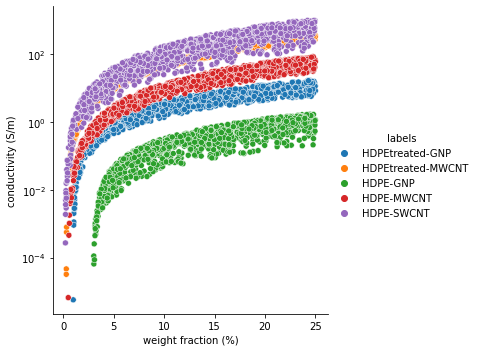

In [4]:
g = sns.relplot(data=alldata ,x="wt_l1", y ="conductivity", hue="labels", kind="scatter"  )
g.set_xlabels("weight fraction (%)")
g.set_ylabels("conductivity (S/m)")
g.set(yscale="log");

## At low weight fraction, the value of threshold depends on type of filler and polymer

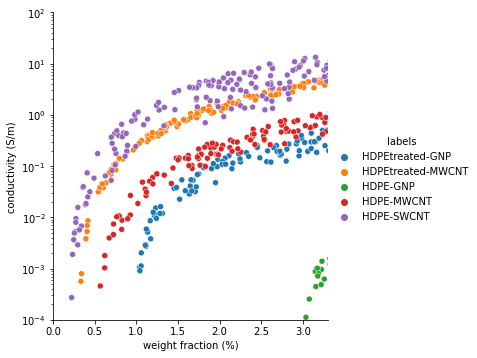

In [5]:
# Zoom in low range of wt
g = sns.relplot(data=alldata ,x="wt_l1", y ="conductivity", hue="labels", kind="scatter"  )
g.set_xlabels("weight fraction (%)")
g.set_ylabels("conductivity (S/m)")
g.set(yscale="log", xlim=[0,3.3], ylim=[1e-4,100]);

## Different Filler has different intrinic conductivity
The filler contributes greatly on electrical conductivity of the composite in overall

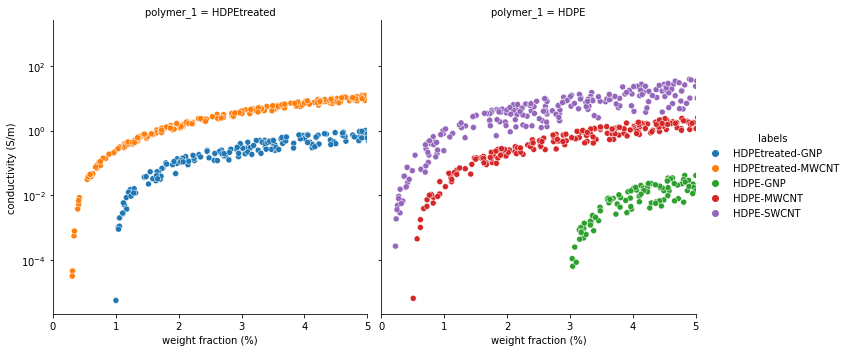

In [6]:
g = sns.relplot(data=alldata ,x="wt_l1", y ="conductivity", hue="labels", kind="scatter", col="polymer_1"  )
g.set_xlabels("weight fraction (%)")
g.set_ylabels("conductivity (S/m)")
g.set(yscale="log", xlim=[0,5]);

## Treated Polymer helps improve conductivity

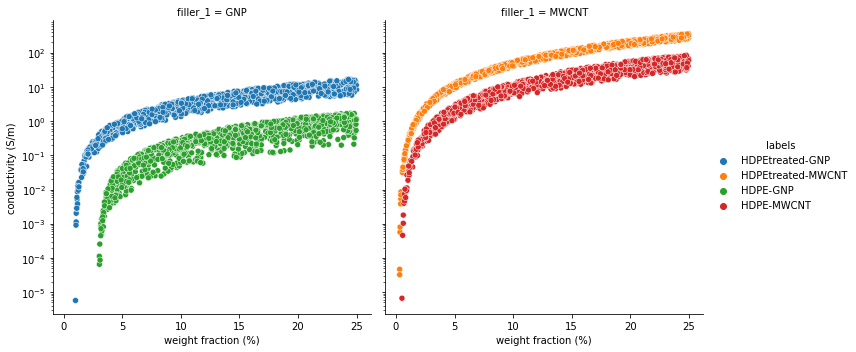

In [7]:
#alldata_MWCNT = alldata [alldata['filler_1']== 'MWCNT' ].copy()  
alldata_treated = alldata [alldata['filler_1'] != 'SWCNT' ].copy()  
g = sns.relplot(data=alldata_treated ,x="wt_l1", y ="conductivity", hue="labels", col="filler_1" )
g.set_xlabels("weight fraction (%)")
g.set_ylabels("conductivity (S/m)")
g.set(yscale="log");

# What are composites missing

Based on total Polymer and Filler, what composites (combination of polymer and filler) are not be studied (generated)

In [8]:
polymer_1_all = alldata.groupby("polymer_1").size().index.to_list()
polymer_1_all_inserted = polymer_1_all.copy()
polymer_1_all_inserted.insert(0, 'Filler')
filler_all     = alldata.groupby("filler_1").size().index.to_list()
all_ability = pd.DataFrame(0, index=np.arange(len(filler_all)), columns=polymer_1_all_inserted)
all_ability['Filler'] = filler_all
all_ability.set_index('Filler', inplace=True)

In [9]:
labels = alldata.groupby("labels").size()
for key in labels.keys():
    polymer, filler = key.split("-")
    all_ability[polymer][filler] = labels[key]
print("Numbers of data row for each composite:")
all_ability

Numbers of data row for each composite:


,HDPE,HDPEtreated
Filler,,
GNP,1000,1000
MWCNT,1000,1000
SWCNT,1000,0


In [10]:
print("Possilbe to predict (which cases have no data):")
list_to_predict = []
for polymer in polymer_1_all:
    index_0 = all_ability[ all_ability[polymer] == 0].index.to_list()
    if index_0:
        for filler in index_0:
            print(polymer+ "-"+filler)
            list_to_predict.append([polymer,filler])
list_to_predict

Possilbe to predict (which cases have no data):
HDPEtreated-SWCNT


[['HDPEtreated', 'SWCNT']]